<a href="https://colab.research.google.com/github/CodeWithSridhar/Electric-Vehicle-Hackathon/blob/main/IRL_Electric_vehicle_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Innomatics Research Labs Hackathon**

### **Data Analysis on Electric Vehicle**

Hackathon Tasks

    Task1 (Description) -
    Apply Exploratory Data Analysis(Univariate and Bivariate) using plotly.express library.

    Task2 (Description) -
    Create a Choropleth to display the number of EV vehicles based on location.

    Task3 (Description) -
    Create a Racing Bar Plot to display the animation of EV Make and its count each year.

Doc Link:
    
   https://docs.google.com/document/d/1oVk3v2x0CcupPhMqvtymotUK2lF6bp8Po9wIVYJPDGg/edit?pli=1

Dataset Link:

   https://drive.google.com/file/d/1P742LU5OTXbfFG2F6drbABk1O8UGf4Cd/view

In [39]:
! pip install plotly

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
path = "/content/drive/MyDrive/Innomatics Hackathon/dataset.csv"
df = pd.read_csv(path)

In [43]:
df

VIN (1-10)     County           City State  Postal Code  Model Year  \
0       JTMEB3FV6N     Monroe       Key West    FL        33040        2022   
1       1G1RD6E45D      Clark       Laughlin    NV        89029        2013   
2       JN1AZ0CP8B     Yakima         Yakima    WA        98901        2011   
3       1G1FW6S08H     Skagit       Concrete    WA        98237        2017   
4       3FA6P0SU1K  Snohomish        Everett    WA        98201        2019   
...            ...        ...            ...   ...          ...         ...   
112629  7SAYGDEF2N       King         Duvall    WA        98019        2022   
112630  1N4BZ1CP7K   San Juan  Friday Harbor    WA        98250        2019   
112631  1FMCU0KZ4N       King         Vashon    WA        98070        2022   
112632  KNDCD3LD4J       King      Covington    WA        98042        2018   
112633  YV4BR0CL8N       King      Covington    WA        98042        2022   

             Make       Model                   Electric Vehicle Type  \
0          TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1       CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2          NISSAN        LEAF          Battery Electric Vehicle (BEV)   
3       CHEVROLET     BOLT EV          Battery Electric Vehicle (BEV)   
4            FORD      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
...           ...         ...                                     ...   
112629      TESLA     MODEL Y          Battery Electric Vehicle (BEV)   
112630     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
112631       FORD      ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
112632        KIA        NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
112633      VOLVO        XC90  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              42   
1                 Clean Alternative Fuel Vehicle Eligible              38   
2                 Clean Alternative Fuel Vehicle Eligible              73   
3                 Clean Alternative Fuel Vehicle Eligible             238   
4                   Not eligible due to low battery range              26   
...                                                   ...             ...   
112629  Eligibility unknown as battery range has not b...               0   
112630            Clean Alternative Fuel Vehicle Eligible             150   
112631            Clean Alternative Fuel Vehicle Eligible              38   
112632              Not eligible due to low battery range              26   
112633              Not eligible due to low battery range              18   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                   NaN       198968248   
1               0                   NaN         5204412   
2               0                  15.0       218972519   
3               0                  39.0       186750406   
4               0                  38.0         2006714   
...           ...                   ...             ...   
112629          0                  45.0       217955265   
112630          0                  40.0       103663227   
112631          0                  34.0       193878387   
112632          0                  47.0       125039043   
112633          0                  47.0       194673692   

                   Vehicle Location  \
0         POINT (-81.80023 24.5545)   
1       POINT (-114.57245 35.16815)   
2       POINT (-120.50721 46.60448)   
3        POINT (-121.7515 48.53892)   
4       POINT (-122.20596 47.97659)   
...                             ...   
112629  POINT (-121.98609 47.74068)   
112630  POINT (-123.01648 48.53448)   
112631   POINT (-122.4573 47.44929)   
112632  POINT (-122.09124 47.33778)   
112633  POINT (-122.09124 47.33778)   

                                         Electric Utility  2020 Census Tract  


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [45]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [47]:
df = df.dropna()
print("Shape of the cleaned DataFrame:", df.shape)

Shape of the cleaned DataFrame: (112152, 17)


In [49]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [48]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [50]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112152.000000  112152.000000   112152.000000  112152.000000   
mean    98258.856659    2019.004494       87.829651    1793.882320   
std       302.889935       2.891859      102.336645   10785.259118   
min     98001.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98121.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99403.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112152.000000    1.121520e+05       1.121520e+05  
mean              29.817703    1.994712e+08       5.303958e+10  
std               14.698726    9.401842e+07       1.617788e+07  
min                1.000000    4.777000e+03       5.300195e+10  
25%               18.000000    1.484164e+08       5.303301e+10  
50%               34.000000    1.923916e+08       5.303303e+10  
75%               43.000000    2.191885e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.307794e+10

▶ Perform Univariate Analysis



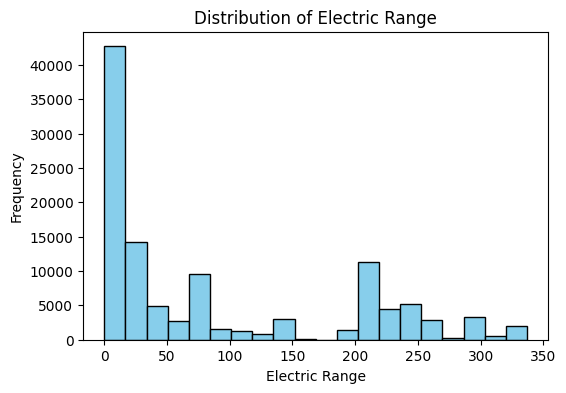

In [51]:
# Plot histogram for 'Electric Range' column
plt.figure(figsize=(6, 4))
plt.hist(df['Electric Range'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

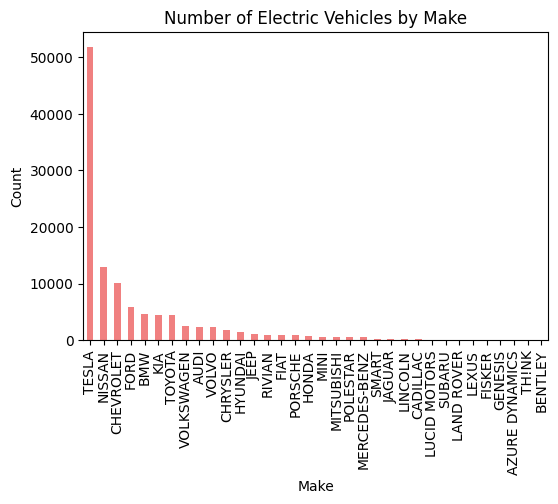

In [52]:
# Plot bar chart for 'Make' column
plt.figure(figsize=(6, 4))
df['Make'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Number of Electric Vehicles by Make')
plt.show()

▶ Perform Bivariate Analysis

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



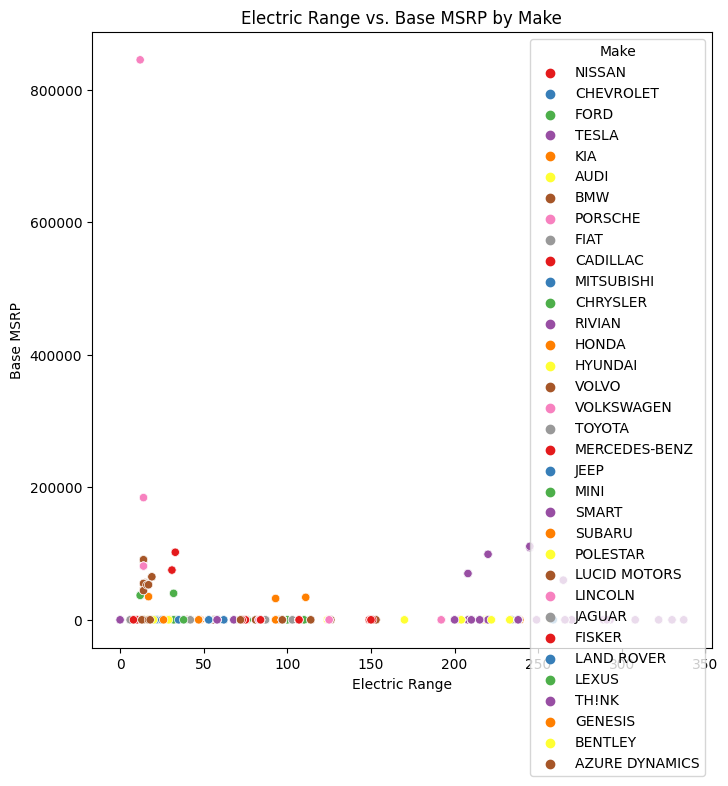

In [53]:
# Scatter plot: 'Electric Range' vs. 'Base MSRP'
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP', hue='Make', palette='Set1')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.title('Electric Range vs. Base MSRP by Make')
plt.show()

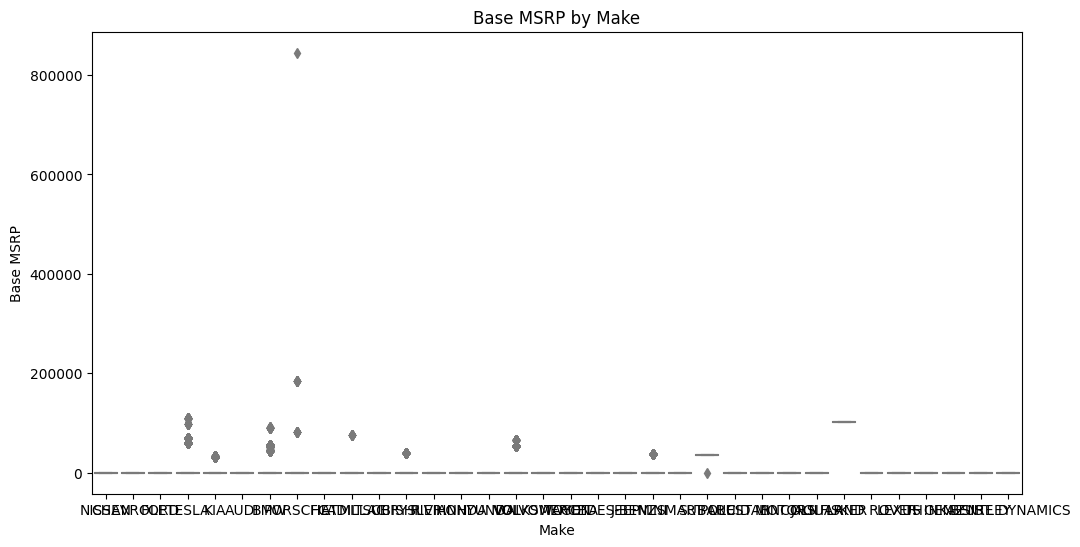

In [54]:
# Box plot: 'Make' vs. 'Base MSRP'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='Base MSRP', palette='Pastel1')
plt.xlabel('Make')
plt.ylabel('Base MSRP')
plt.title('Base MSRP by Make')
plt.show()

## **Choropleth map**

In [56]:
fig = px.choropleth(df,  # DataFrame containing the data
                    locations='County',  # Column with the locations (e.g., country names, state names)
                    locationmode='USA-states',  # Set the location mode (e.g., 'country names', 'USA-states')
                    color='Electric Utility',  # Column with the data to be visualized (number of EV vehicles)
                    hover_name='Electric Vehicle Type',  # Column with the hover text (tooltip) information
                    title='Number of EV Vehicles by Location',  # Title of the Choropleth map
                    color_continuous_scale='Viridis',  # Color scale ('Viridis', 'RdBu', 'YlGnBu', etc.)
                    projection='natural earth'  # Projection type ('equirectangular', 'mercator', 'natural earth')
                   )

# Show the Choropleth map
fig.show()


# **Racing Bar Plot**


In [57]:
import random
years = list(range(2010, 2024))
makes = ['Tesla', 'Nissan', 'Chevrolet', 'BMW', 'Ford']
data = []

for year in years:
    for make in makes:
        count = random.randint(100, 1000)
        data.append({'Year': year, 'Make': make, 'Count': count})

df = pd.DataFrame(data)


In [58]:
fig = px.bar(df,
             x='Count',
             y='Make',
             animation_frame='Year',
             orientation='h',
             title='EV Make Count Over the Years',
             labels={'Count': 'Count of EVs'},
             range_x=[0, df['Count'].max() + 100],
             color='Make',
             color_discrete_sequence=px.colors.qualitative.Prism
             )

fig.show()

# **Summary**

The combination of EDA, Choropleth maps and Racing Bar Plots allowed to gain a comprehensive understanding of the electric vehicle dataset.

The analysis will provide valuable insights for stakeholders in the automotive industry, policymakers, and researchers.

These findings could be used to make informed decisions, identify potential areas for improvement, and drive the adoption of electric vehicles as a sustainable and eco-friendly transportation solution.